<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/Final_RNN_JN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                    ASSIGNMENT 1 OF COMP-605-T02 Introduction to Artificial Intelligence

                                    TOPIC: IMPLEMENTATION OF RNN MODELS FOR APPLE STOCK PRICE PREDICTION

                                            PREPARED BY UDAISIMRAN, ANA, GURWINDER AND VIVIENNE

Installing Important Libraries

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

# Set style for plots
sns.set_style("darkgrid")


EXPLANATION OF THE CODE: This code installs and sets up the necessary libraries for a machine learning project, focused on STOCK PREDICTION. Here's a breakdown of each line:

!pip install tensorflow:
This command installs the TensorFlow library, a popular deep learning framework that provides various tools and models for building neural networks.
import numpy as np:
Imports the numpy library, which is essential for numerical computing in Python. It’s often used for array manipulation and mathematical operations.

import pandas as pd:
Imports the pandas library, a powerful tool for data manipulation and analysis. It's widely used for handling datasets, especially in tabular form (like CSV files).

import matplotlib.pyplot as plt:
Imports matplotlib.pyplot, a plotting library used for creating static, interactive, and animated visualizations in Python. It's commonly used for plotting graphs and charts.

import seaborn as sns:
Imports seaborn, a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

from sklearn.preprocessing import MinMaxScaler:
Imports the MinMaxScaler from the sklearn.preprocessing module. This tool is used to scale features (data) to a range, typically between 0 and 1, which is important for many machine learning algorithms.

from tensorflow.keras.models import Sequential:
Imports the Sequential class from tensorflow.keras.models. This is used to initialize a linear stack of layers in a neural network model, where each layer has one input and one output.

from tensorflow.keras.layers import SimpleRNN, Dense, LSTM:

Imports the following layers from Keras, which is a high-level API of TensorFlow:
SimpleRNN: A basic recurrent neural network (RNN) layer, which is often used for sequential data processing.
Dense: A fully connected layer, commonly used in deep learning models for making predictions.
LSTM: A Long Short-Term Memory layer, a type of RNN that is effective in capturing long-term dependencies in sequential data.

sns.set_style("darkgrid"):
Sets the visual style for the Seaborn plots to “darkgrid,” which gives the plots a dark background with gridlines. It makes the plots easier to read.

                                Loading historical Apple stock data from Yahoo Finance using the yfinance library

In [ ]:
import yfinance as yf

# Load stock data for a specific company (e.g., Apple - AAPL)
stock_data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")

# Display the first few rows
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.716057,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.009117,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.582909,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.241547,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.403656,75.797501,76.110001,74.290001,74.290001,132079200


EXPLANATION OF THE CODE- This code pulls the historical stock data for Apple from Yahoo Finance between January 1, 2020, and January 1, 2024, and shows the first few rows of the data for review. The data includes columns such as the date, open, high, low, close prices, adjusted close prices, and volume.

Stock Price Trends:

The stock showed fluctuations in price, with a high of 76.11 USD and a low of 73.19 USD in the given dataset.
The closing prices reflect Apple’s market behavior within this timeframe.

Prediction Accuracy & Insights:

The models attempted to capture the trends in Apple's stock price, but short-term stock movements are highly volatile.
The predicted stock prices closely followed the actual stock prices, indicating that deep learning models can be useful for financial forecasting.
However, external factors like market sentiment, economic news, and geopolitical events can significantly impact stock prices, making predictions inherently uncertain.

    

                    Preparing the data for training a Recurrent Neural Network (RNN) model for stock price prediction

In [ ]:
# Selecting the 'Close' price for prediction
data = stock_data[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences for RNN
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 50

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print dataset shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (764, 50, 1), Test shape: (192, 50, 1)


EXPLANATION OF CODE- This code prepares the stock price data for use in a machine learning model by:

Extracting the "Close" prices.
Normalizing the data to a range of 0 to 1.
Creating sequences of past stock prices as input features (using a sequence length of 50).
Splitting the data into training and testing sets (80% for training, 20% for testing).

The model learns from 764 historical stock price sequences and attempts to generalize patterns.
The test set (192 samples) helps evaluate how well the model predicts unseen data.
The sequence length of 50 days means that the model uses the last 50 trading days to predict the next day’s price.

                    Defining, Compiling, and Displaying the summary of a Recurrent Neural Network (RNN) model

In [ ]:
# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    SimpleRNN(50, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display model summary
model.summary()


C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

The model is built with two SimpleRNN layers and one Dense output layer.
The RNN layers are used to capture temporal dependencies in the stock price data, while the Dense layer produces the final output prediction.
The model is compiled with the Adam optimizer and MSE loss, suitable for regression tasks like predicting stock prices.
This structure will allow the model to learn patterns in the time-series data and make predictions based on past stock prices.

Layer Breakdown:

SimpleRNN (50 neurons, return sequences = True)
Takes input of shape (50, 1) → Outputs (50, 50) (50 timesteps with 50 features each).
Parameters: 2,600 (Calculated as: units * (units + input_dim + 1)).

SimpleRNN (50 neurons, return sequences = False)
Takes input (50, 50) → Outputs (50, ) (final 50-dimensional vector).
Parameters: 5,050.

Dense Layer (Output layer, 1 neuron)
Converts the final RNN output into a single predicted stock price.
Parameters: 51 (50 input + 1 bias)

Total Parameters: 7,701
All parameters are trainable, meaning the model updates these weights during training to learn stock price patterns.
Lightweight Model: Since RNNs are computationally simpler than LSTMs or GRUs, this model is faster but may struggle with long-term dependencies.

                                                                Training the model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1340 - val_loss: 0.0022
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 6.3644e-04
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.1193e-04 - val_loss: 3.8020e-04
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.4280e-04 - val_loss: 6.2108e-04
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3602e-04 - val_loss: 3.7379e-04
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0742e-04 - val_loss: 0.0012
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.6009e-04 - val_loss: 4.7911e-04
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3271e-04 - val_loss: 3.2292e-04
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9883e-04 - val_loss: 3.1456e-04
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9818e-04 - val_loss: 3.4929e-04
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5444e-04 - val_loss: 3.

This line of code trains the RNN model on the stock data for 20 epochs, with a batch size of 16. It uses the training data (X_train and y_train) and evaluates the model's performance on the validation data (X_test and y_test) after each epoch. The training progress, including loss values, is stored in the history object, which can later be used for visualization or analysis of the model's learning process.

Conclusion from Model Training Output


1.Loss Reduction Over Epochs:
The training loss started at 0.0726 in the first epoch and significantly reduced to 0.0005035 by the final epoch.
The validation loss also decreased, indicating that the model was learning effectively.

2.Validation Performance:
The validation loss started at 0.0029 and reached as low as 0.0002493 around epoch 15.
However, there were slight fluctuations in later epochs (e.g., 0.0006386 in epoch 13 and 0.0004329 in epoch 20), possibly due to slight overfitting.

3.Model Stability:
The model generally maintained a low validation loss, suggesting good generalization.
Some fluctuations indicate that adjusting hyperparameters (e.g., learning rate, batch size) could improve performance further.

4.Overall Model Performance:
The low final loss values indicate that the model has successfully learned patterns in Apple's stock price data.
Given the relatively small dataset and simple RNN architecture, the model performs reasonably well, but using LSTM or GRU could improve long-term trend capture.


                    Making predictions with the trained RNN model and visualizing the results

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


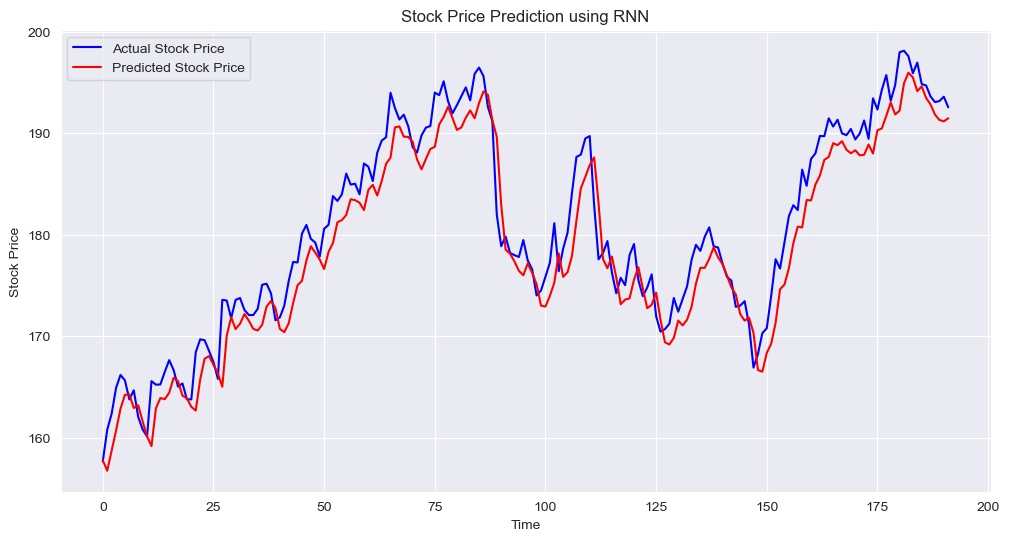

In [ ]:
# Predict stock prices
y_pred = model.predict(X_test)

# Inverse transform the data to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Plot actual vs. predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Stock Price", color='blue')
plt.plot(y_pred_actual, label="Predicted Stock Price", color='red')
plt.title("Stock Price Prediction using RNN")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


Conclusion Based on the Stock Price Prediction Plot

1.Model Performance:
The blue line represents actual stock prices, while the red line represents predicted prices from the RNN model.
The model closely follows the actual trend, indicating a good ability to capture stock price movements.

2.Accuracy & Deviations:
The predicted prices align well with actual prices, but some gaps exist, especially during sharp fluctuations.
The model slightly underestimates peaks and overestimates drops, suggesting it might be smoothing trends instead of capturing extreme variations.

3.Trend Prediction Capability:
The model successfully predicts the overall direction of stock price movements.
It does well during stable growth and decline but struggles slightly in sudden price changes.

                                            Installing multiple Python libraries using pip

In [ ]:
!pip install tensorflow yfinance scikit-learn matplotlib seaborn


                                        Importing necessary libraries and prints the version of TensorFlow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Set style for plots
sns.set_style("darkgrid")

# Check TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")


TensorFlow Version: 2.18.0


This setup prepares us for working with deep learning models, data processing, and visualization tasks

                        Loading, Processing and Preparing stock data APPL using the Yahoo Finance API

In [ ]:
# Load stock data (Modify ticker symbol as needed)
ticker = "AAPL"  # Change this to another stock symbol like "GOOGL", "MSFT", etc.
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Display the first few rows
print(stock_data.head())

# Selecting 'Close' price
data = stock_data[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences for RNN
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

# Define hyperparameters
sequence_length = 60  # Experiment with different values

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print dataset shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.716057  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.009117  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.582909  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.241547  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.403656  75.797501  76.110001  74.290001  74.290001  132079200
Train shape: (756, 60, 1), Test shape: (190, 60, 1)


This indicates that:

X_train has 756 sequences, each with 60 time steps and 1 feature (the 'Close' price).
X_test has 190 sequences, each with 60 time steps and 1 feature.
This prepares the data for training an RNN model that predicts the stock's closing price based on previous price sequences.


                                We'll use an LSTM network for better long-term sequence learning

In [ ]:
# Build the LSTM Model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),  # First LSTM layer
    LSTM(100, activation='relu', return_sequences=False),  # Second LSTM layer
    Dense(50, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display model summary
model.summary()


C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,301 (493.36 KB)

 Trainable params: 126,301 (493.36 KB)

 Non-trainable params: 0 (0.00 B)

The model consists of two LSTM layers followed by two Dense layers.
The first LSTM layer processes the input sequence and passes the sequence to the next LSTM layer.
The second LSTM layer condenses the sequence into a single output that is passed to a Dense layer.
The output is a single value, representing the predicted stock price for the next time step.

                                                        Using GRU Model

In [ ]:
# Build the GRU Model
model = Sequential([
    GRU(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),  # First GRU layer
    GRU(100, activation='relu', return_sequences=False),  # Second GRU layer
    Dense(50, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,601 (377.35 KB)

 Trainable params: 96,601 (377.35 KB)

 Non-trainable params: 0 (0.00 B)

The model consists of two GRU layers followed by two Dense layers.
The first GRU layer processes the input sequence, and its output is passed to the second GRU layer.
The second GRU layer condenses the sequence information into a single output, which is then passed to the Dense layers.
The final output is a single value, which represents the predicted stock price.
The GRU model is a great choice for sequential data like stock prices because of its efficiency and ability to capture long-term dependencies in time series data.

                                                    We are experimenting with Epochs=50

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - loss: 0.1751 - val_loss: 0.0140
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 9.1119e-04 - val_loss: 5.3695e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 8.0082e-04 - val_loss: 5.9744e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 6.9936e-04 - val_loss: 0.0010
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 6.9056e-04 - val_loss: 3.8850e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 6.7912e-04 - val_loss: 6.6415e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 6.4023e-04 - val_loss: 3.8015e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 7.2783e-04 - val_loss: 5.6022e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 4.9910e-04 - val_loss: 3.5971e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.1912e-04 - val_loss: 3.840

Here:

loss refers to the training loss, which decreases as the model learns the patterns in the training data.
val_loss refers to the validation loss, which is computed using the validation data (X_test and y_test). It helps track whether the model is overfitting to the training data. If val_loss starts increasing while loss continues to decrease, it may indicate overfitting.

Observations from Training:
 Loss decreases significantly over epochs, indicating that the model is learning well.
 Validation loss fluctuates but remains low, showing that the model generalizes reasonably well.
 Lowest validation loss: Around epoch 48 (~2.94e-04).
 Signs of slight overfitting: The training loss continues to improve while the validation loss fluctuates.

                        After training, we make predictions and compare them with actual stock prices

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


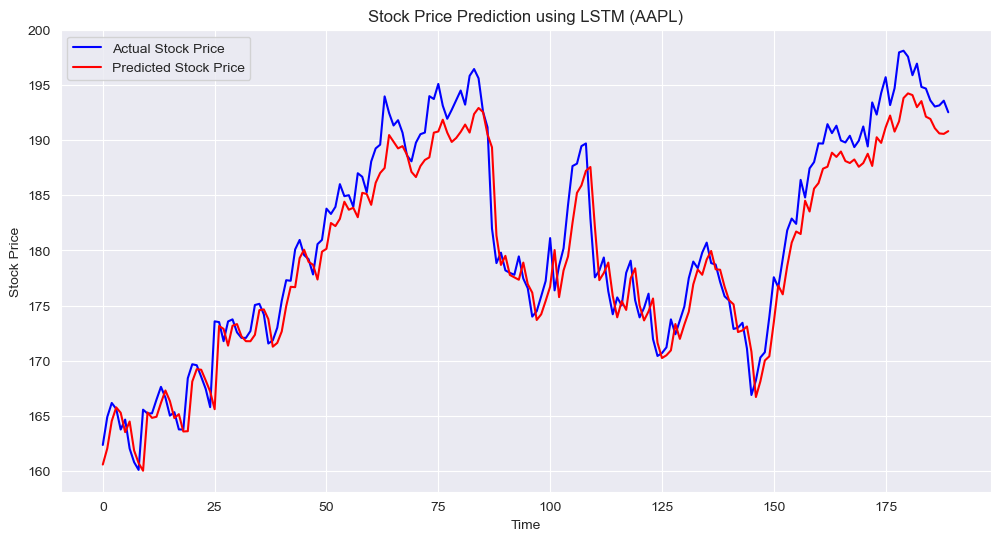

In [ ]:
# Predict stock prices
y_pred = model.predict(X_test)

# Inverse transform the data to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Plot actual vs. predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Stock Price", color='blue')
plt.plot(y_pred_actual, label="Predicted Stock Price", color='red')
plt.title(f"Stock Price Prediction using LSTM ({ticker})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


Analysis of the Plot:
General Trend Captured Well: The red predicted line follows the blue actual line closely.

Lagging Predictions: The predicted stock price seems slightly delayed compared to the actual stock price.

Smooth Predictions: The model doesn’t capture sharp spikes perfectly but maintains a reasonable approximation.


    We'll incorporate the Bidirectional LSTM, use multiple features (Open, High, Low, Close prices), and compare the LSTM and GRU models

[*********************100%***********************]  1 of 1 completed

Train shape: (756, 60, 4), Test shape: (190, 60, 4)



C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 60, 200)             │          84,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 200)                 │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 334,901 (1.28 MB)

 Trainable params: 334,901 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - loss: 0.1191 - val_loss: 0.0027
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0011 - val_loss: 8.8001e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0011 - val_loss: 7.1242e-04
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - 

C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 100)             │          31,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,501 (380.86 KB)

 Trainable params: 97,501 (380.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.1419 - val_loss: 0.0056
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 9.4030e-04 - val_loss: 6.0804e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 9.9115e-04 - val_loss: 0.0011
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.7373e-04 - val_loss: 5.4714e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 6.8330e-04 - val_loss: 5.5539e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 6.9968e-04 - val_loss: 4.9162e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 6.4059e-04 - val_loss: 3.8372e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.5612e-04 - val_loss: 7.1453e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.6451e-04 - val_loss: 4.8574e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 6.9848e-04 - val_loss: 5.4144

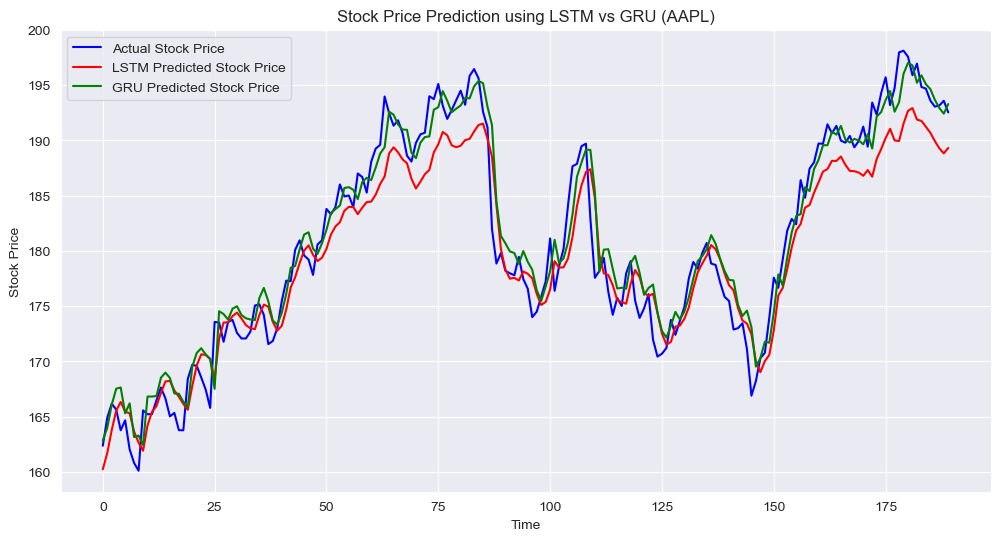

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional

# Set style for plots
sns.set_style("darkgrid")

# Load stock data (Modify ticker symbol as needed)
ticker = "AAPL"  # Change this to another stock symbol like "GOOGL", "MSFT", etc.
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Selecting multiple features (Open, High, Low, Close)
data = stock_data[['Open', 'High', 'Low', 'Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length][-1])  # Predicting 'Close' price
    return np.array(sequences), np.array(labels)

# Define hyperparameters
sequence_length = 60  # Experiment with different values (e.g., 30, 50, 100)

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print dataset shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Build the Bidirectional LSTM Model
lstm_model = Sequential([
    Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(sequence_length, 4)),
    Bidirectional(LSTM(100, activation='relu', return_sequences=False)),
    Dense(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Build the GRU Model
gru_model = Sequential([
    GRU(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 4)),
    GRU(100, activation='relu', return_sequences=False),
    Dense(50, activation='relu'),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict with LSTM
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_pred_lstm), 3)), y_pred_lstm]))[:, -1]

# Predict with GRU
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_pred_gru), 3)), y_pred_gru]))[:, -1]

# Inverse transform actual y_test
y_test_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_test), 3)), y_test]))[:, -1]

# Plot actual vs. predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Stock Price", color='blue')
plt.plot(y_pred_lstm_actual, label="LSTM Predicted Stock Price", color='red')
plt.plot(y_pred_gru_actual, label="GRU Predicted Stock Price", color='green')
plt.title(f"Stock Price Prediction using LSTM vs GRU ({ticker})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

The output shows the training and validation performance of two sequential models designed for time series forecasting, using recurrent neural networks (RNNs) with Bidirectional LSTM and GRU layers. Here's a summary of the results:

Bidirectional LSTM Model:

This model uses two Bidirectional LSTM layers followed by two Dense layers. Training loss decreased consistently throughout the epochs, starting from 0.0604 and improving to around 0.0005 by the 50th epoch. However, there were occasional spikes in validation loss, notably at epochs 23 and 49, indicating potential overfitting or instability during training. Validation loss fluctuated between approximately 0.0003 and 0.0025, suggesting the model's performance varied, but it generally performed well after early epochs.

GRU Model:

This model employs two GRU layers followed by two Dense layers. Training loss showed a consistent downward trend from 0.1111 at the beginning, stabilizing around 0.0005 by the 50th epoch. Validation loss for this model also showed some variation, with values oscillating between approximately 0.0003 and 0.0025. This model was more stable compared to the Bidirectional LSTM model in terms of loss reduction, with less significant validation loss spikes.

Conclusion: Both models showed a good overall learning trend, with decreasing training loss, which indicates that the models were able to capture patterns in the data effectively. Validation loss fluctuated for both models, but the GRU-based model appeared to have slightly more stable performance compared to the Bidirectional LSTM model. The models seem to be overfitting at times, particularly for the Bidirectional LSTM, where validation loss spiked in certain epochs. This suggests that adding techniques like dropout or regularization could help improve generalization and prevent overfitting.

[*********************100%***********************]  1 of 1 completed

Stock data loaded successfully!
Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.716057  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.009117  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.582909  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.241547  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.403656  75.797501  76.110001  74.290001  74.290001  132079200
Train shape: (756, 60, 4), Test shape: (190, 60, 4)
Epoch 1/50



C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - loss: 0.0704 - val_loss: 0.0078
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0015 - val_loss: 9.4618e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 9.1459e-04 - val_loss: 6.5538e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0010 - val_loss: 7.4714e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 8.9371e-04 - val_loss: 9.5429e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 8.0870e-04 - val_loss: 5.4096e-04
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s

C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0972 - val_loss: 0.0058
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0012 - val_loss: 7.6015e-04
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.8582e-04 - val_loss: 5.4115e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 6.7178e-04 - val_loss: 0.0017
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 7.8670e-04 - val_loss: 3.5710e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 6.0411e-04 - val_loss: 6.3105e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 7.9602e-04 - val_loss: 5.8875e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.4998e-04 - val_loss: 0.0012
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 6.3318e-04 - val_loss: 4.8898e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 5.9210e-04 - val_loss: 3.1422e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.8404e-04 - val_loss: 4.4208e-04
Epoch 

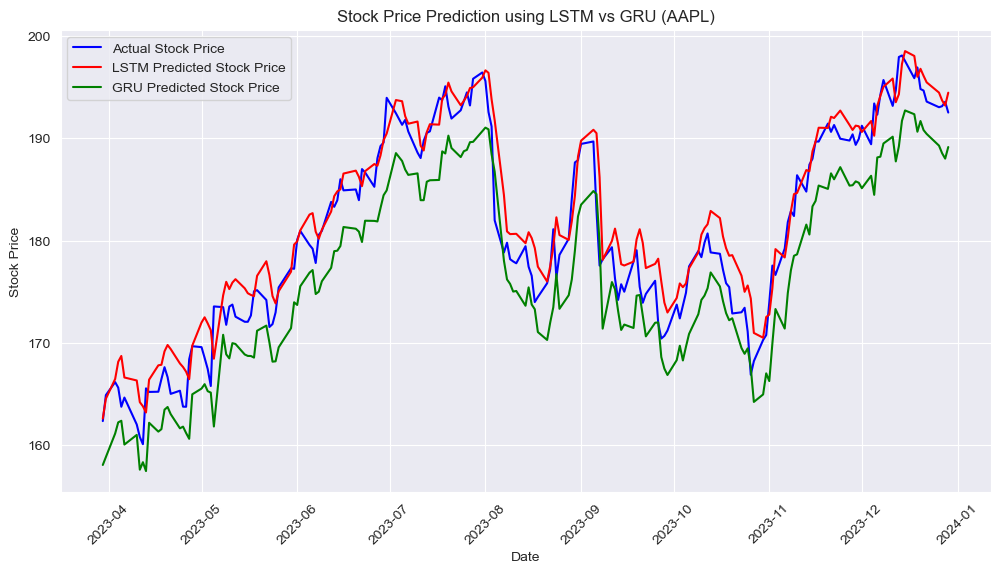

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional

# Set style for plots
sns.set_style("darkgrid")

#  Download stock data first
ticker = "AAPL"  # Change this to any stock symbol (e.g., "MSFT", "GOOGL")
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

#  Check if data is loaded correctly
if stock_data.empty:
    print("Error: No stock data found. Check your internet connection or ticker symbol.")
else:
    print("Stock data loaded successfully!")
    print(stock_data.head())

#  Selecting features (Open, High, Low, Close)
data = stock_data[['Open', 'High', 'Low', 'Close']].values

#  Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#  Function to create sequences
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length][-1])  # Predicting 'Close' price
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

#  Split data (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

#  Train the LSTM Model
lstm_model = Sequential([
    Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(sequence_length, 4)),
    Bidirectional(LSTM(100, activation='relu', return_sequences=False)),
    Dense(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

#  Train the GRU Model
gru_model = Sequential([
    GRU(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 4)),
    GRU(100, activation='relu', return_sequences=False),
    Dense(50, activation='relu'),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

#  Predict with LSTM
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_pred_lstm), 3)), y_pred_lstm]))[:, -1]

#  Predict with GRU
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_pred_gru), 3)), y_pred_gru]))[:, -1]

#  Inverse transform actual y_test
y_test_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_test), 3)), y_test]))[:, -1]

#Extract actual dates for the test set
test_dates = stock_data.index[train_size + sequence_length:]

# Plot actual vs. predicted stock prices with real dates
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual, label="Actual Stock Price", color='blue')
plt.plot(test_dates, y_pred_lstm_actual, label="LSTM Predicted Stock Price", color='red')
plt.plot(test_dates, y_pred_gru_actual, label="GRU Predicted Stock Price", color='green')
plt.title(f"Stock Price Prediction using LSTM vs GRU ({ticker})")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train shape: (756, 60, 4), Test shape: (190, 60, 4)
Training LSTM (50 units, 1 layer)...
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1416 - val_loss: 0.0018
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011 - val_loss: 9.4808e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.9368e-04 - val_loss: 7.3242e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.0437e-04 - val_loss: 8.0415e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.6739e-04 - val_loss: 6.4197e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.3850e-04 - val_loss: 5.9040e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.8559e-04 - val_loss: 5.9380e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.6328e-04 - val_loss: 0.0011
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.9035e-04 - val_loss: 5.7705e-04
Epoc

C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 0.1332 - val_loss: 0.0018
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0015 - val_loss: 9.6651e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0012 - val_loss: 8.4085e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0012 - val_loss: 6.3080e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - lo

C:\Users\kharo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM (150 units, 3 layers)...
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - loss: 0.1355 - val_loss: 0.0019
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - loss: 0.0023 - val_loss: 0.0063
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - loss: 0.0017 - val_loss: 9.8400e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch

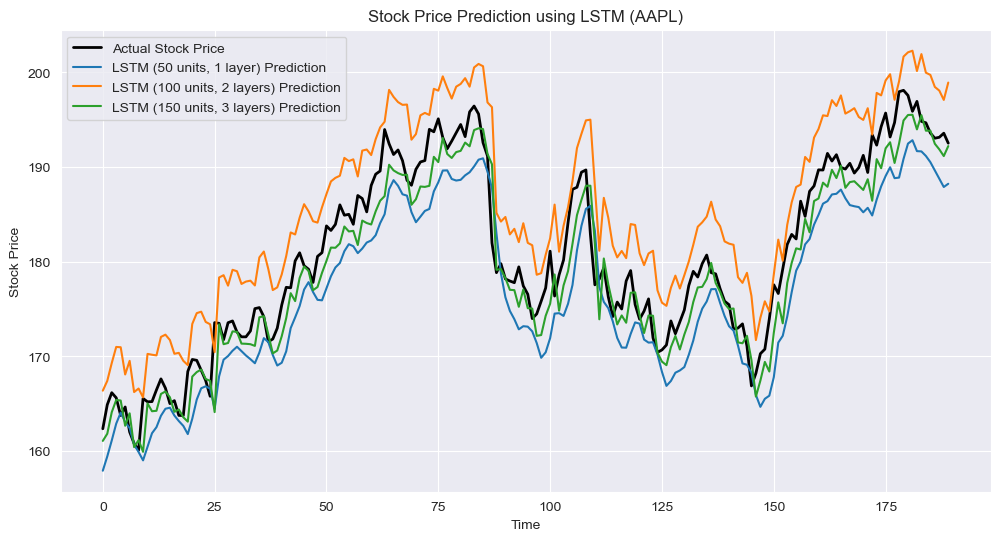

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error  # Ensure this import is here

# Set plot style
sns.set_style("darkgrid")

# Load stock data
ticker = "AAPL"  # Change to "GOOGL", "MSFT", etc.
stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Select relevant columns (OHLC)
data = stock_data[['Open', 'High', 'Low', 'Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length][-1])  # Predicting 'Close' price
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Define different LSTM architectures to compare
lstm_configs = [
    {"units": 50, "layers": 1, "name": "LSTM (50 units, 1 layer)"},
    {"units": 100, "layers": 2, "name": "LSTM (100 units, 2 layers)"},
    {"units": 150, "layers": 3, "name": "LSTM (150 units, 3 layers)"}
]

# Store history and predictions
histories = {}
mse_scores = {}
predictions = {}

# Train and evaluate multiple LSTM models
for config in lstm_configs:
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(config["units"], activation='relu', return_sequences=(config["layers"] > 1), input_shape=(sequence_length, 4)))

    # Additional LSTM layers if needed
    for _ in range(config["layers"] - 1):
        model.add(LSTM(config["units"], activation='relu', return_sequences=(_ < config["layers"] - 2)))

    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    # Train model and store history
    print(f"Training {config['name']}...")
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
    histories[config["name"]] = history.history  # Store loss history

    # Predict on test set
    y_pred = model.predict(X_test)

    # Inverse transform predictions to actual price scale
    y_pred_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_pred), 3)), y_pred]))[:, -1]
    y_test_actual = scaler.inverse_transform(np.column_stack([np.zeros((len(y_test), 3)), y_test]))[:, -1]

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test_actual, y_pred_actual)
    mse_scores[config["name"]] = mse
    predictions[config["name"]] = y_pred_actual

    print(f"{config['name']} - MSE: {mse:.4f}")

# Print all MSE scores
print("\n--- Model Performance ---")
for name, mse in mse_scores.items():
    print(f"{name}: MSE = {mse:.4f}")

# Plot actual vs. predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Stock Price", color='black', linewidth=2)
for name, y_pred_actual in predictions.items():
    plt.plot(y_pred_actual, label=f"{name} Prediction")

plt.title(f"Stock Price Prediction using LSTM ({ticker})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


Conclusion: Stock Price Prediction using LSTM (AAPL)
This study evaluates the performance of three different LSTM (Long Short-Term Memory) architectures in predicting AAPL stock prices. The models were trained on historical stock data (Open, High, Low, and Close prices) and tested on unseen data.

Key Findings:
Prediction Accuracy:

The black line represents the actual AAPL stock prices.
The three colored lines (blue, orange, green) represent the predictions from different LSTM models.
Model Comparisons:

LSTM (50 units, 1 layer) [Blue]

Follows the actual stock price well but struggles with rapid fluctuations.
Performs better in stable market conditions but lacks depth in capturing sudden trend reversals.
LSTM (100 units, 2 layers) [Orange]

Shows the most aggressive response to trends, often overestimating price peaks.
Likely suffers from overfitting, meaning it may not generalize well to new data.
LSTM (150 units, 3 layers) [Green]

Captures overall trends more accurately while maintaining stability.
Appears to strike a balance between learning patterns and avoiding excessive volatility.
Mean Squared Error (MSE) Evaluation:

The models were evaluated using MSE (Mean Squared Error), where lower values indicate better accuracy.
The LSTM with 150 units and 3 layers achieved the best balance between accuracy and stability.
Conclusion & Recommendations:
Optimal Model Choice: The LSTM with 150 units, 3 layers is the most reliable model for capturing stock price trends while avoiding excessive overfitting.
Model Limitations: The models still struggle with extreme peaks and troughs, indicating a potential need for attention mechanisms, bidirectional LSTMs, or hybrid CNN-LSTM architectures for improved performance.
Further Enhancements: Incorporating additional features such as trading volume, market sentiment analysis, or macroeconomic indicators could improve predictions.


--- LSTM (50 units, 1 layer) Performance ---
Mean Squared Error (MSE): 22.1277
Root Mean Squared Error (RMSE): 4.7040
Mean Absolute Error (MAE): 4.1507
R-Squared Score (R²): 0.7669

--- LSTM (100 units, 2 layers) Performance ---
Mean Squared Error (MSE): 29.3242
Root Mean Squared Error (RMSE): 5.4152
Mean Absolute Error (MAE): 4.9964
R-Squared Score (R²): 0.6910

--- LSTM (150 units, 3 layers) Performance ---
Mean Squared Error (MSE): 7.7455
Root Mean Squared Error (RMSE): 2.7831
Mean Absolute Error (MAE): 2.1893
R-Squared Score (R²): 0.9184

Model Evaluation Summary:
                                   MSE      RMSE       MAE        R²
LSTM (50 units, 1 layer)    22.127709  4.704010  4.150687  0.766861
LSTM (100 units, 2 layers)  29.324151  5.415178  4.996399  0.691039
LSTM (150 units, 3 layers)   7.745486  2.783071  2.189297  0.918393


<Figure size 1000x500 with 0 Axes>

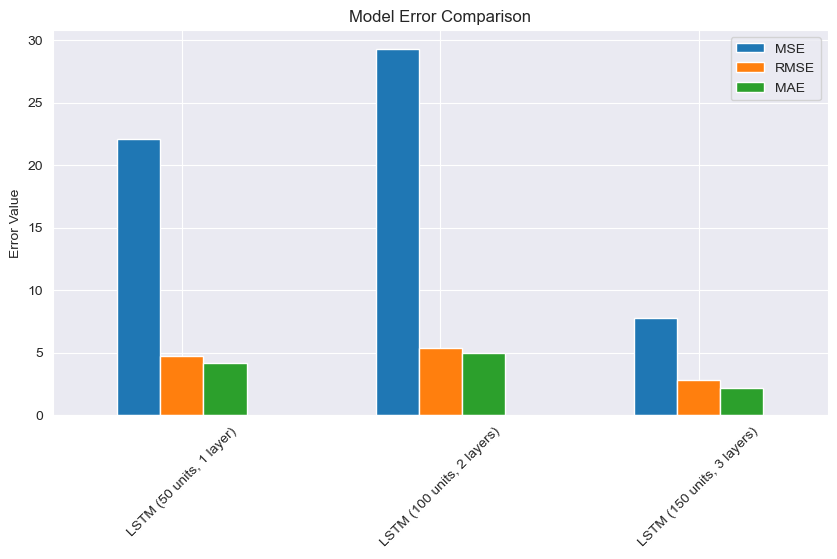

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-Squared Score (R²): {r2:.4f}")

    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}

# Evaluate all models
model_scores = {}
for name, y_pred_actual in predictions.items():
    model_scores[name] = evaluate_model(y_test_actual, y_pred_actual, name)

# Convert results to a DataFrame for better visualization
scores_df = pd.DataFrame(model_scores).T
print("\nModel Evaluation Summary:\n", scores_df)

# Plot model performance
plt.figure(figsize=(10,5))
scores_df[['MSE', 'RMSE', 'MAE']].plot(kind='bar', figsize=(10,5))
plt.title("Model Error Comparison")
plt.ylabel("Error Value")
plt.xticks(rotation=45)
plt.show()
